reading the trending topics from a JSON file

In [1]:
import json
json1_file = open('november28.json')
json1_str = json1_file.read()
json1_data = json.loads(json1_str)

In [2]:
d=json1_data


reading the city ,woeids from the city data file

In [3]:
import pandas as pd
data=pd.DataFrame()
data=pd.read_csv('woeids.csv')
k=data[['city','woeid']]
t=tuple(k['city'][:40])


In [4]:
i=0
d1={}
for i in range(40):
    if(len(d[t[i]])>10):
        d1[t[i]]=d[t[i]][:10]
    else:
        d1[t[i]]=d[t[i]]
        
    

generating the graph using the networkx module 

In [5]:
import networkx as nx
g=nx.Graph()
g.add_nodes_from(t)
trend='#CashAppBlackFriday'
for i in range(40):
    for j in range(40):
        j1=0
        i1=0
        for j1 in range(40):
            if trend in d1[t[j]]:
                i1=i1+1
        if i1>5:
            if trend in d1[t[i]] and trend in d1[t[j]] and t[i]!=t[j]:
                g.add_edge(t[i],t[j])

In [ ]:
writing the file to a gml file

In [8]:
g.edges()
nx.write_gml(g,'cashapp.gml')

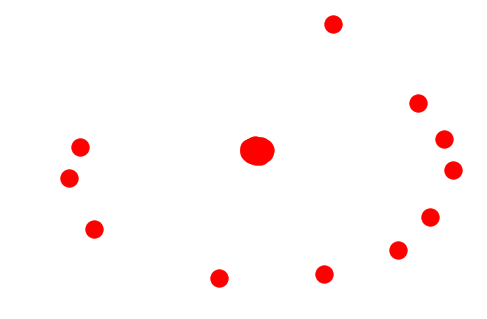

In [9]:
import matplotlib.pyplot as plt
nx.draw(g)

In [10]:
cop=d1

In [12]:
len(cop[t[1]])

10

writing the common trends to a excel file

import xlwt 
from xlwt import Workbook 
wb = Workbook()
sheet1 = wb.add_sheet('Sheet 1')
i1=0
i2=0
for i1 in range(40):
    for i2 in range(40):
        if i1!=1 :
            i=0
            j=0
            for i in range(10):
                if cop[t[i1]][i] in cop[t[i2]]:
                    j=j+1
            sheet1.write(i1,i2, j) 
wb.save('common.xls')
            